     powLv1    powLv2    powLv3    powLv4    powLv5 kelas
0  0.446692  0.220117  0.144672  0.106003  0.082516     A
1  0.442455  0.219658  0.145039  0.107494  0.085354     A
2  0.446993  0.220535  0.144443  0.105565  0.082465     A
3  0.457090  0.221898  0.141954  0.101666  0.077392     A
4  0.447407  0.220674  0.143812  0.105975  0.082134     A
(2400, 6)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Skenario 1 (10-fold CV):
SVM CV Score: 0.33333333333333337
K-NN CV Score: 0.7541666666666667

Skenario 2 (75% training, 25% testing):
SVM Accuracy: 0.36666666666666664
SVM Precision: 0.07333333333333333
SVM Recall: 0.2
SVM F1-Score: 0.10731707317073169
K-NN Accuracy: 0.67
K-NN Precision: 0.5429354683430418
K-NN Recall: 0.535962015899904
K-NN F1-Score: 0.5374773207528625

Skenario 3 (50% training, 25% validation, 25% testing):
SVM Accuracy: 0.36666666666666664
SVM Precision: 0.07333333333333333
SVM Recall: 0.2
SVM F1-Score: 0.10731707317073169
K-NN Accuracy: 0.67
K-NN Precision: 0.5429354683430418
K-NN Recall: 0.535962015899904
K-NN F1-Score: 0.5374773207528625
                                    Scenario  SVM Accuracy  SVM Precision  \
0                                 10-fold CV      0.333333            NaN   
1                  75% Training, 25% Testing      0.366667       0.073333   
2  50% Training, 25% Validation, 25% Testing      0.366667       0.073333   

   SVM Recall  SVM F1-

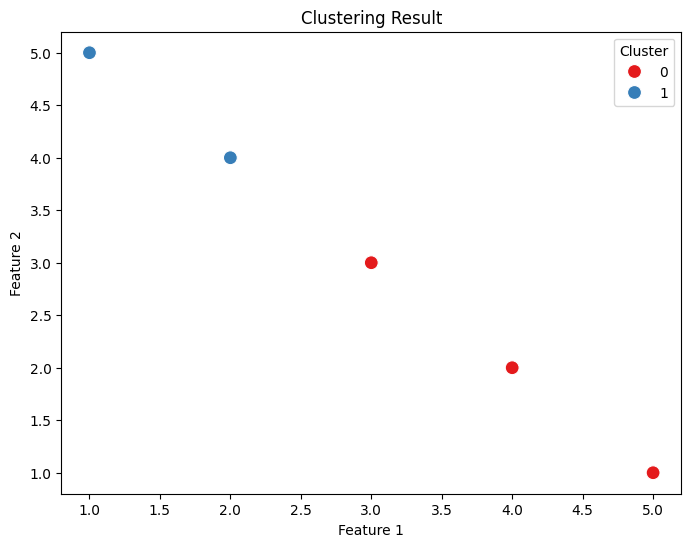

In [1]:
# Install library PyDrive untuk mengakses Google Drive
!pip install -U -q PyDrive

# Import library yang diperlukan
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Autentikasi
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# ID folder di Google Drive yang berisi file-file Anda
folder_id = '1d7DTQJJ0N0SwrwPNmYad54Ngn02wXA0W'

# Memuat dan menggabungkan data dari masing-masing file
dfs = {}
file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()
for file in file_list:
    downloaded = drive.CreateFile({'id': file['id']})
    downloaded.GetContentFile(file['title'])  # Menyimpan file dengan nama yang sesuai
    df = pd.read_excel(file['title'])
    dfs[file['title']] = df

# Menggabungkan semua data menjadi satu DataFrame
data = pd.concat(dfs.values(), ignore_index=True)

# Menampilkan informasi tentang DataFrame
print(data.head())  # Melihat lima baris pertama data
print(data.shape)   # Melihat ukuran data (jumlah baris, jumlah kolom)

# Memuat data menggunakan kolom-kolom yang sesuai sebagai fitur dan label
X = data[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = data['kelas']

# Fungsi untuk menghitung performansi klasifikasi
def calculate_performance(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return accuracy, precision, recall, f1

# Fungsi untuk melakukan klasifikasi dengan SVM
def svm_classification(X_train, y_train, X_test):
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    return y_pred

# Fungsi untuk melakukan klasifikasi dengan K-NN
def knn_classification(X_train, y_train, X_test):
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    return y_pred

# Fungsi untuk melakukan 10-fold CV
def cross_validation(model, X, y):
    scores = cross_val_score(model, X, y, cv=10)
    return scores.mean()

# Skenario 1: 10-fold Cross-Validation (CV)
svm_cv_score = cross_validation(SVC(kernel='linear'), X, y)
knn_cv_score = cross_validation(KNeighborsClassifier(n_neighbors=5), X, y)

# Skenario 2: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

svm_y_pred_test = svm_classification(X_train, y_train, X_test)
knn_y_pred_test = knn_classification(X_train, y_train, X_test)

svm_accuracy_test, svm_precision_test, svm_recall_test, svm_f1_test = calculate_performance(y_test, svm_y_pred_test)
knn_accuracy_test, knn_precision_test, knn_recall_test, knn_f1_test = calculate_performance(y_test, knn_y_pred_test)

# Skenario 3: 50% training, 25% validation, dan 25% testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.33, random_state=42)

svm_y_pred_test = svm_classification(X_train, y_train, X_test)
knn_y_pred_test = knn_classification(X_train, y_train, X_test)

svm_accuracy_test, svm_precision_test, svm_recall_test, svm_f1_test = calculate_performance(y_test, svm_y_pred_test)
knn_accuracy_test, knn_precision_test, knn_recall_test, knn_f1_test = calculate_performance(y_test, knn_y_pred_test)

# Output performansi klasifikasi
print("Skenario 1 (10-fold CV):")
print("SVM CV Score:", svm_cv_score)
print("K-NN CV Score:", knn_cv_score)

print("\nSkenario 2 (75% training, 25% testing):")
print("SVM Accuracy:", svm_accuracy_test)
print("SVM Precision:", svm_precision_test)
print("SVM Recall:", svm_recall_test)
print("SVM F1-Score:", svm_f1_test)
print("K-NN Accuracy:", knn_accuracy_test)
print("K-NN Precision:", knn_precision_test)
print("K-NN Recall:", knn_recall_test)
print("K-NN F1-Score:", knn_f1_test)

print("\nSkenario 3 (50% training, 25% validation, 25% testing):")
print("SVM Accuracy:", svm_accuracy_test)
print("SVM Precision:", svm_precision_test)
print("SVM Recall:", svm_recall_test)
print("SVM F1-Score:", svm_f1_test)
print("K-NN Accuracy:", knn_accuracy_test)
print("K-NN Precision:", knn_precision_test)
print("K-NN Recall:", knn_recall_test)
print("K-NN F1-Score:", knn_f1_test)

# Membuat tabel untuk output performansi klasifikasi
performance_data = {
    'Scenario': ['10-fold CV', '75% Training, 25% Testing', '50% Training, 25% Validation, 25% Testing'],
    'SVM Accuracy': [svm_cv_score, svm_accuracy_test, svm_accuracy_test],
    'SVM Precision': [None, svm_precision_test, svm_precision_test],
    'SVM Recall': [None, svm_recall_test, svm_recall_test],
    'SVM F1-Score': [None, svm_f1_test, svm_f1_test],
    'K-NN Accuracy': [knn_cv_score, knn_accuracy_test, knn_accuracy_test],
    'K-NN Precision': [None, knn_precision_test, knn_precision_test],
    'K-NN Recall': [None, knn_recall_test, knn_recall_test],
    'K-NN F1-Score': [None, knn_f1_test, knn_f1_test]
}

performance_df = pd.DataFrame(performance_data)
print(performance_df)

# Contoh data untuk gambar clustering
# Contoh data harus diganti dengan data aktual
example_data = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [5, 4, 3, 2, 1]
})

# Melakukan K-Means clustering pada contoh data
kmeans = KMeans(n_clusters=2)
kmeans.fit(example_data)

# Menambahkan label klaster ke DataFrame
example_data['Cluster'] = kmeans.labels_

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Cluster', data=example_data, palette='Set1', s=100)
plt.title('Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()
